### NLTK 기본 사용법
* pip install nltk를 통해 설치
* 특정 모듈을 다운로드하기 위해서는 nltk.download()를 사용

In [1]:
import nltk

# nltk.download() 
# nltk.download('maxent_treebank_pos_tagger')

#### nltk에서 제공되는 gutenberg data read

In [2]:
from nltk.corpus import gutenberg

# 저장되어 있는 데이터 로드 및 파일 제목 확인
gutenberg_files = gutenberg.fileids()
gutenberg_files

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
# 특정 텍스트 확인
gutenberg_doc = gutenberg.open('austen-emma.txt').read()
print(gutenberg_doc[:200])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; an


#### Tokenize

In [4]:
# tokenize - 띄어쓰기 기준으로 단어를 분리하여 list 형태로 저장

sentence = """At eight o'clock on Thursday morning ... Arthur didn't feel very good."""

tokens = nltk.word_tokenize(sentence) #nltk의 word_tokenize 함수를 써서 sentence를 tokenize한다
tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 '...',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

#### PoS tagging

In [5]:
# Pos tagging - token 단위로 Pos를 추가하여 tuple - list 형태로 저장 

tagged = nltk.pos_tag(tokens) #tokens의 안의 list자료를 pos_tag함수에 넣어 준다. / tag를 투플로 구성된 리스트 형식으로 
tagged
for word in tagged:
    print(word)

('At', 'IN')
('eight', 'CD')
("o'clock", 'NN')
('on', 'IN')
('Thursday', 'NNP')
('morning', 'NN')
('...', ':')
('Arthur', 'NNP')
('did', 'VBD')
("n't", 'RB')
('feel', 'VB')
('very', 'RB')
('good', 'JJ')
('.', '.')


In [6]:
for word in tagged: 
    if word[1][0] == 'V':
        print(word[0].lower()+'/'+word[1])
#투플형태에서 동사만 뽑아 줌. word[1]은 두번째 자리 'IN'에서 [0]은 첫번째 자리 I이게 'V'이면 프린트 해라.

# 같은 표현 = list comprehension
tagged_word = [word[0].lower()+'/'+word[1] for word in tagged if word[1][0] == 'N']

did/VBD
feel/VB


In [7]:
# 결과 확인
tagged_word

["o'clock/NN", 'thursday/NNP', 'morning/NN', 'arthur/NNP']

### Alphabetical list of part-of-speech tags used in the Penn Treebank Project:
https://www.cis.upenn.edu/~treebank/

```CC Coordinating conjunction
CD Cardinal number
DT Determiner
EX Existential there
FW Foreign word
IN Preposition or subordinating conjunction
JJ Adjective
JJR Adjective, comparative
JJS Adjective, superlative
LS List item marker
MD Modal
NN Noun, singular or mass
NNS Noun, plural
NNP Proper noun, singular
NNPS Proper noun, plural
PDT Predeterminer
POS Possessive ending
PRP Personal pronoun
PRP$ Possessive pronoun
RB Adverb
RBR Adverb, comparative
RBS Adverb, superlative
RP Particle
SYM Symbol
TO to
UH Interjection
VB Verb, base form
VBD Verb, past tense
VBG Verb, gerund or present participle
VBN Verb, past participle
VBP Verb, non­3rd person singular present
VBZ Verb, 3rd person singular present
WDT Wh­determiner
WP Wh­pronoun
WP$ Possessive wh­pronoun
WRB Wh­adverb```

#### 이전에 불러온 gutenberg_doc 데이터를 가지고 tokenize + Pos tag를 해보자

In [8]:
gutenberg_tokens = nltk.word_tokenize(gutenberg_doc)
gutenberg_tagged = nltk.pos_tag(gutenberg_tokens)

In [9]:
# 시간을 체크하고 싶다면 time library를 사용해보자
# %%timeit
import time

start_time = time.time()
## 실행 코드
gutenberg_tokens = nltk.word_tokenize(gutenberg_doc)
gutenberg_tagged = nltk.pos_tag(gutenberg_tokens)

print("Processed time = ",(time.time() - start_time))

Processed time =  12.496500015258789


In [10]:
gutenberg_tokens[:10] #짤려진 토큰의 0부터 10개를 출력해주세요.

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER']

In [11]:
gutenberg_tagged[:10]

[('[', 'NNS'),
 ('Emma', 'NNP'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 (']', 'NNP'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP')]

### 실습 1 : Gutenberg file에서 다른 텍스트 데이터를 읽고 tokenize + PoS tagging

In [12]:
gutenberg_doc = gutenberg.open('shakespeare-hamlet.txt').read()
gutenberg_tokens = nltk.word_tokenize(gutenberg_doc)
gutenberg_tagged = nltk.pos_tag(gutenberg_tokens)

In [13]:
gutenberg_tokens[:10]

['[',
 'The',
 'Tragedie',
 'of',
 'Hamlet',
 'by',
 'William',
 'Shakespeare',
 '1599',
 ']']

In [14]:
gutenberg_tagged[:10]

[('[', 'IN'),
 ('The', 'DT'),
 ('Tragedie', 'NNP'),
 ('of', 'IN'),
 ('Hamlet', 'NNP'),
 ('by', 'IN'),
 ('William', 'NNP'),
 ('Shakespeare', 'NNP'),
 ('1599', 'CD'),
 (']', 'NNP')]

In [22]:
#햄릿에서 NNP인걸 찾아보는 함수를 짜보기
NNP_list = []

for word in gutenberg_tagged: 
    if word[1] == 'NNP' :
            NNP_list.append(word[0].lower()+'/'+word[1])
            
NNP_list[:20]

['tragedie/NNP',
 'hamlet/NNP',
 'william/NNP',
 'shakespeare/NNP',
 ']/NNP',
 'actus/NNP',
 'primus/NNP',
 'scoena/NNP',
 'prima/NNP',
 'enter/NNP',
 'barnardo/NNP',
 'francisco/NNP',
 'centinels/NNP',
 'barnardo/NNP',
 'fran/NNP',
 'nay/NNP',
 'stand/NNP',
 'bar/NNP',
 'long/NNP',
 'king/NNP']

#### Stemming (or lemmatizing)
단어의 어근을 추출하기 위해 stemming!

Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

The word "meeting" can be either the base form of a noun or a form of a verb ("to meet") depending on the context, e.g., "in our last meeting" or "We are meeting again tomorrow". Unlike stemming, lemmatisation can in principle select the appropriate lemma depending on the context.

In [23]:
# lemmatization
lemma = nltk.wordnet.WordNetLemmatizer()
gutenberg_lemma = []

# 분리한 token에 대하여 nltk lemmatizing 하고 그 결과를 lemma list에 추가
for token in gutenberg_tokens:
    gutenberg_lemma.append(lemma.lemmatize(token))

gutenberg_lemma[:20]

['[',
 'The',
 'Tragedie',
 'of',
 'Hamlet',
 'by',
 'William',
 'Shakespeare',
 '1599',
 ']',
 'Actus',
 'Primus',
 '.',
 'Scoena',
 'Prima',
 '.',
 'Enter',
 'Barnardo',
 'and',
 'Francisco']

In [24]:
# tokenizing -> lemmatizing -> PoS tagging

gutenberg_lemma_tagged = nltk.pos_tag(gutenberg_lemma)
gutenberg_lemma_tagged[:20]

[('[', 'IN'),
 ('The', 'DT'),
 ('Tragedie', 'NNP'),
 ('of', 'IN'),
 ('Hamlet', 'NNP'),
 ('by', 'IN'),
 ('William', 'NNP'),
 ('Shakespeare', 'NNP'),
 ('1599', 'CD'),
 (']', 'NNP'),
 ('Actus', 'NNP'),
 ('Primus', 'NNP'),
 ('.', '.'),
 ('Scoena', 'NNP'),
 ('Prima', 'NNP'),
 ('.', '.'),
 ('Enter', 'NNP'),
 ('Barnardo', 'NNP'),
 ('and', 'CC'),
 ('Francisco', 'NNP')]

In [25]:
# stemming

from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
gutenberg_stemmed = []
for token in gutenberg_tokens:
    gutenberg_stemmed.append(porter_stemmer.stem(token))

gutenberg_stemmed[:20]

['[',
 'the',
 'tragedi',
 'of',
 'hamlet',
 'by',
 'william',
 'shakespear',
 '1599',
 ']',
 'actu',
 'primu',
 '.',
 'scoena',
 'prima',
 '.',
 'enter',
 'barnardo',
 'and',
 'francisco']

In [26]:
start_time = time.time()
gutenberg_stemmed_tagged = nltk.pos_tag(gutenberg_stemmed)
print(time.time() - start_time)
#gutenberg_stemmed_tagged

2.377685070037842


In [27]:
# compare Stemming & Lemmatization
print(porter_stemmer.stem('running')) #stemmer는 running을 run(기본형)으로 바꿔준다.
print(lemma.lemmatize('running'))

run
running


### Collection library
-  https://docs.python.org/3/library/collections.html#collections.Counter.most_common

In [61]:
import collections # token으로 나눠진 데이터를 딕셔너리 형태로 변환 + 편리한 함수를 제공하는 library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # 결과를 시각화 하기 위한 matplotlib
%matplotlib inline


# token - frequency 형태로 변환 : collections.Counter 함수! 
# 투플로 구성된 것의 빈도수를 제공. ex) 'the'는 DT형태이고, 993번 나옴.
print(collections.Counter(gutenberg_stemmed_tagged).most_common(100))

[((',', ','), 2892), (('.', '.'), 1879), (('the', 'DT'), 993), (('and', 'CC'), 862), (('of', 'IN'), 576), (('to', 'TO'), 574), ((':', ':'), 566), (('I', 'PRP'), 550), (('you', 'PRP'), 522), (('?', '.'), 459), (('a', 'DT'), 435), (('my', 'PRP$'), 435), (('it', 'PRP'), 354), (('is', 'VBZ'), 349), (('in', 'IN'), 347), (('not', 'RB'), 327), ((';', ':'), 298), (('ham', 'NN'), 292), (('your', 'PRP$'), 259), (('with', 'IN'), 254), (('but', 'CC'), 249), (('for', 'IN'), 243), (('that', 'IN'), 233), (('me', 'PRP'), 230), (('what', 'WP'), 212), (('lord', 'NN'), 204), (('be', 'VB'), 186), (('him', 'PRP'), 178), (('he', 'PRP'), 160), (('thi', 'NN'), 153), (('will', 'MD'), 152), (('king', 'NN'), 149), (('so', 'RB'), 138), (("'d", 'MD'), 135), (('our', 'PRP$'), 132), (('hi', 'NN'), 131), (('as', 'IN'), 126), (('are', 'VBP'), 121), (('on', 'IN'), 115), (('thi', 'JJ'), 112), (('To', 'TO'), 109), (('then', 'RB'), 108), (('shall', 'MD'), 107), (('hi', 'JJ'), 100), (('good', 'JJ'), 98), (('we', 'PRP'), 98

In [62]:
# tuple 형태로 저장되어 있는 데이터를 token, frequency로 나눠서 저장
token_list = []
freq_list = []
for token, freq in collections.Counter(gutenberg_stemmed_tagged).most_common(10):
    token_list.append(token)
    freq_list.append(freq)
    
print(token_list[:4])
print(freq_list[:4])

[(',', ','), ('.', '.'), ('the', 'DT'), ('and', 'CC')]
[2892, 1879, 993, 862]


In [63]:
# list로 나눈 데이터를 pandas 형태로 저장
data = pd.concat([pd.DataFrame(token_list),pd.DataFrame(freq_list)], axis=1)
data.columns = ['word','tag','freq']
data.head()

,word,tag,freq
0,",",",",2892
1,.,.,1879
2,the,DT,993
3,and,CC,862
4,of,IN,576


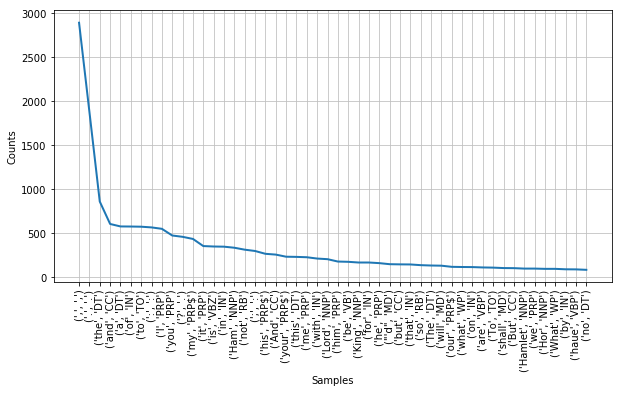

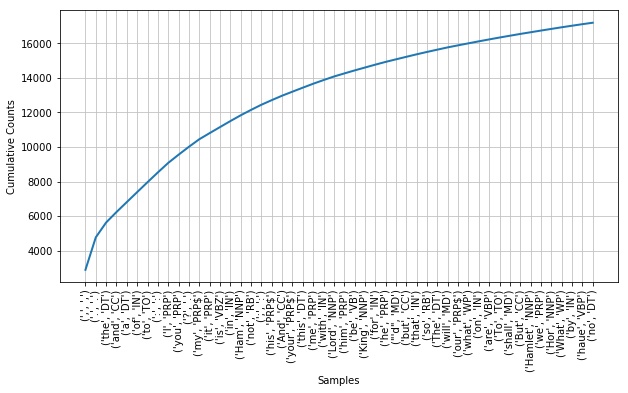

In [66]:
# word index 대신 word를 보여주는 그래프
freqdist = nltk.FreqDist(gutenberg_lemma_tagged)
plt.figure(figsize=(10,5))
freqdist.plot(50)

plt.figure(figsize=(10,5))
freqdist.plot(50,cumulative=True)

#### 결과를 살펴보면 ','과 '.' 같이 단어가 아닌 문자가 높은 frequency를 가지고 있음
#### Stop-words 제거 필요

In [67]:
# nltk에서 제공되는 stop word 사용
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

for index, ele in enumerate(stop_words):
    if index<20:
        print(index,ele)    

0 few
1 t
2 aren
3 here
4 ourselves
5 after
6 why
7 most
8 nor
9 have
10 to
11 hasn
12 a
13 them
14 shouldn
15 not
16 other
17 i
18 on
19 in


In [68]:
# domain specific stop-words를 update하여 사용할 수 도 있음 #아래부분을 제거해서 출력

stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}'])

# 대소문자가 다르게 인식되기 때문에 lowercase로 변환하여 사용
filtered_words = [word[0].lower() for word in gutenberg_lemma_tagged if word[0].lower() not in stop_words]
filtered_tag = [word[1].lower() for word in gutenberg_lemma_tagged if word[0].lower() not in stop_words]
filtered_words[:10]

['tragedie',
 'hamlet',
 'william',
 'shakespeare',
 '1599',
 'actus',
 'primus',
 'scoena',
 'prima',
 'enter']

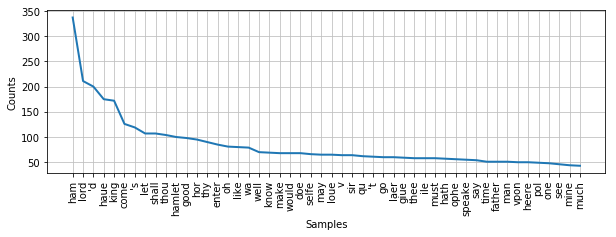

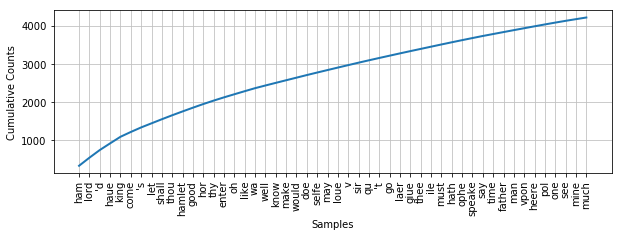

In [71]:
# stop word list에 'mr.' 추가하면 없어짐
freqdist = nltk.FreqDist(filtered_words)
plt.figure(figsize=(10,3))
freqdist.plot(50)

plt.figure(figsize=(10,3))
freqdist.plot(50,cumulative=True)

### 실습 3 - 명사만 추출하여 고유한 리스트를 만들어 보자

In [72]:
# Dataframe 설정
result = pd.DataFrame()
result['filtered_word'] = filtered_words
result['filtered_freq'] = filtered_tag

# csv 형태로 저장
result.to_csv("filtered_word.csv")